In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler , OrdinalEncoder , OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import zipfile
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
import pickle



In [5]:
  
# Create function to unzip a zipfile into current working directory 
# (since we're going to be downloading and unzipping a few files)
import zipfile



def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
unzip_data('obesity_classification.zip')

In [16]:
df= pd.read_csv('ObesityDataSet.csv')

In [17]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [8]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
df['MTRANS'].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [10]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [11]:
df['MTRANS']

0       Public_Transportation
1       Public_Transportation
2       Public_Transportation
3                     Walking
4       Public_Transportation
                ...          
2106    Public_Transportation
2107    Public_Transportation
2108    Public_Transportation
2109    Public_Transportation
2110    Public_Transportation
Name: MTRANS, Length: 2111, dtype: object

In [99]:
data = df.copy()

In [100]:

X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [106]:
data['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [107]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'MLP Classifier': MLPClassifier()
}


In [119]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [121]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


In [122]:
pipeline_models = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    pipeline.fit(X_train, y_train_encoded)
    
    pipeline_models[name] = pipeline

C:\Users\Hatim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Hatim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [123]:
accuracy_scores = {}

for name, pipeline in pipeline_models.items():
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    accuracy_scores[name] = accuracy

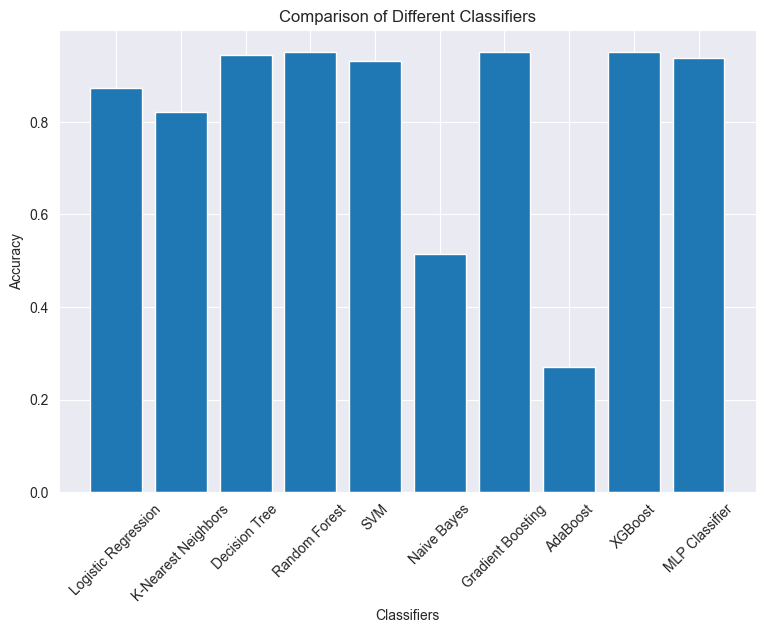

In [124]:
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')
plt.title('Comparison of Different Classifiers')
plt.xticks(rotation=45)
plt.show()


In [129]:
accuracy_scores

{'Logistic Regression': 0.8723404255319149,
 'K-Nearest Neighbors': 0.8203309692671394,
 'Decision Tree': 0.9432624113475178,
 'Random Forest': 0.950354609929078,
 'SVM': 0.9314420803782506,
 'Naive Bayes': 0.5153664302600472,
 'Gradient Boosting': 0.950354609929078,
 'AdaBoost': 0.2695035460992908,
 'XGBoost': 0.950354609929078,
 'MLP Classifier': 0.9385342789598109}

In [115]:


# Save each model separately
for name, pipeline in pipeline_models.items():
    model = pipeline.named_steps['model']
    with open(f'{name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)


In [116]:

test_row = X_test[9]

test_row_reshaped = test_row.reshape(1, -1)
# 
# xgboost_model = pipeline_models['XGBoost']
# 
# prediction = xgboost_model.predict(test_row_reshaped)
# prediction

KeyError: 9

In [126]:
from sklearn.pipeline import Pipeline

# Choose the model to use for prediction
model_name = 'Logistic Regression'  # Choose the model name from the saved models

loaded_pipeline = pipeline_models.get(model_name)

if loaded_pipeline is None:
    print(f"Model '{model_name}' not found!")
else:
    loaded_model = loaded_pipeline.named_steps['model']
    
    predictions = loaded_pipeline.predict(X_test[0:3])
    print("Predictions:", predictions)


Predictions: [0 4 0]


In [128]:
y_test_encoded[0:3]

array([0, 4, 0])